In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate the moon-shaped data
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)  # Adjust parameters as needed

# Create a Pandas DataFrame
df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'class': y})

# Display the first few rows of the DataFrame
df.head()

,X1,X2,class
0,1.645654,-0.536487,1
1,0.113649,0.569574,1
2,0.757790,-0.339259,1
3,-1.146562,0.231257,0
4,-0.655267,0.090329,0


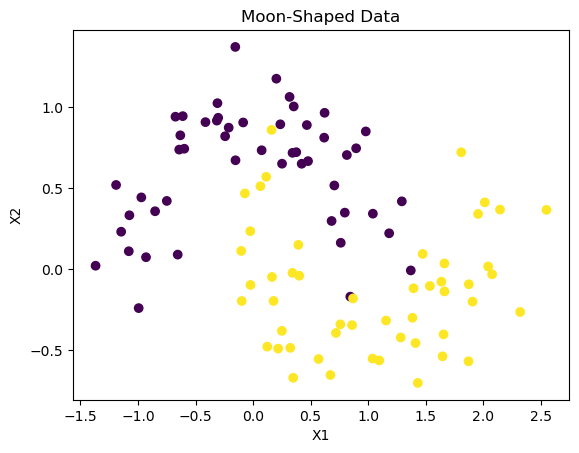

In [2]:
# Create the scatter plot
plt.scatter(df['X1'], df['X2'], c=df['class'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Moon-Shaped Data')
plt.show()

In [3]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

<h1> Implementing Xavier Glorot Weight Initialization Technique</h1>

<h3>Primarily for sigmoid / tanh activation functions</h3>

In [6]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
initial_weights = model.get_weights()

initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

model.set_weights(initial_weights)

model.get_weights()

[array([[ 0.6431065 , -0.6068579 ,  0.5894296 ,  0.6548525 ,  0.08044157,
         -0.02460323,  1.2045124 , -0.72423166,  0.6081081 ,  2.3201869 ],
        [ 0.07647584, -0.21545622, -0.74528664, -0.27326941,  1.0589544 ,
         -0.4191835 ,  0.14466698, -1.5374172 ,  1.2240218 , -1.0684061 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.11657581,  0.54090273,  0.19714005,  0.89097387,  0.11343484,
         -0.19586435,  0.17201705,  0.10483938,  0.12948753, -0.05890341],
        [-0.34660348, -0.44994023,  0.02535002,  0.33629936,  0.11694217,
          0.27981976,  0.12913309,  0.32517654,  0.17238013,  0.4010016 ],
        [-0.2244799 , -1.0143356 ,  0.07338914, -0.4558989 , -0.12950245,
         -0.05413795,  0.07224667,  0.6464421 ,  0.09514587, -0.6197886 ],
        [-0.56698245, -0.09012925,  0.19094054,  0.07764569,  0.37163743,
          0.00747631,  0.11762566,  0.31696835,  0.18545465,  0.44268134],
        [-0.16907

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.5141 - loss: 0.6877 - val_accuracy: 0.6000 - val_loss: 0.6805
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6273 - loss: 0.6775 - val_accuracy: 0.6000 - val_loss: 0.6735
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6922 - loss: 0.6709 - val_accuracy: 0.6500 - val_loss: 0.6665
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6922 - loss: 0.6604 - val_accuracy: 0.7000 - val_loss: 0.6594
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7398 - loss: 0.6477 - val_accuracy: 0.7000 - val_loss: 0.6526
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7719 - loss: 0.6379 - val_accuracy: 0.7000 - val_loss: 0.6461
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8156 - loss: 0.6288 - val_accuracy: 0.7000 - val_loss: 0.6397
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8125 - loss: 0.6253 - val_accuracy: 0.7500 - val_los

In [10]:
model.get_weights()

[array([[ 0.775682  , -0.6977512 ,  0.49994054,  0.57779896, -0.05820043,
          0.16613826,  1.2385751 , -0.65119153,  0.5414154 ,  2.115526  ],
        [ 0.11091336, -0.39263973, -0.91684204, -0.46324956,  0.97181886,
         -0.5860269 ,  0.09136438, -1.4925407 ,  1.4476695 , -1.1841785 ]],
       dtype=float32),
 array([ 0.07567626,  0.07521628, -0.06639861, -0.0044087 ,  0.04130822,
         0.07902946,  0.14786306, -0.04046258, -0.15286323,  0.21973518],
       dtype=float32),
 array([[ 1.23490073e-01,  5.93801796e-01,  2.67724723e-01,
          8.16044569e-01,  1.99030697e-01, -2.01631695e-01,
          3.11938882e-01,  8.39219764e-02,  2.69809971e-03,
          5.86517565e-02],
        [-3.25799644e-01, -5.75758159e-01, -2.84855417e-03,
          3.10441226e-01,  1.34602323e-01,  2.88171738e-01,
          1.39680167e-04,  4.22287375e-01,  2.49036685e-01,
          2.83852071e-01],
        [-2.43312344e-01, -1.15783405e+00,  2.71678507e-01,
         -6.59002483e-01, -1.42860

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

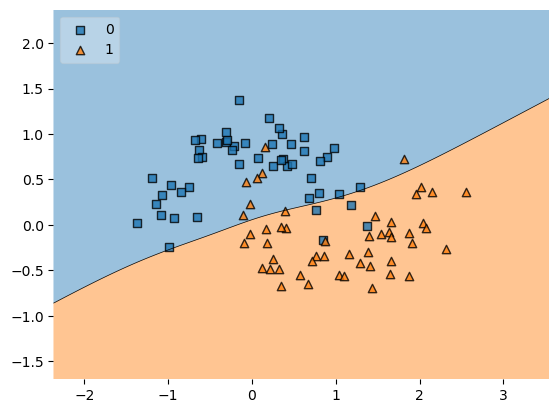

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

<h1>He Kaiming Weight Initialization Technique</h1>

<h3>Primarily for Relu activation function</h3>

In [12]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.get_weights()

[array([[ 0.29337803,  1.8948052 , -0.58840257, -1.0909057 ,  0.53115475,
          0.610827  ,  0.2822598 , -0.17497459, -0.80500793, -0.2744611 ],
        [ 0.91394955, -0.6823718 , -0.14640437, -0.31702572, -1.0920491 ,
          0.5836568 ,  0.6565468 , -1.4768624 , -1.2467563 ,  0.17611408]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-1.2739412e-01, -1.7772566e-01, -2.8853634e-01,  3.8147041e-01,
         -1.3031605e-01,  1.7641050e-01,  2.5699061e-01,  1.4869922e-01,
          4.6073452e-01, -7.8480475e-02],
        [ 1.7696747e-01, -7.9476106e-01,  3.4797147e-01,  4.6507639e-01,
         -4.4898406e-01, -3.6572012e-01, -1.6384554e-01,  4.0594146e-01,
          1.0368223e-01, -3.3006713e-01],
        [-2.0321497e-01,  1.2783559e-01,  5.7560623e-01,  3.1733906e-01,
         -3.1996918e-01,  4.0884003e-01,  3.5978258e-02, -2.6575273e-01,
         -4.4007534e-01, -3.4056213e-02],
        [ 2.9620075e-01, -3.2359162e-01, -6.95963

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step - accuracy: 0.5555 - loss: 0.7617 - val_accuracy: 0.4000 - val_loss: 0.8415
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5437 - loss: 0.7627 - val_accuracy: 0.4000 - val_loss: 0.8028
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5148 - loss: 0.7558 - val_accuracy: 0.4000 - val_loss: 0.7676
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5211 - loss: 0.7490 - val_accuracy: 0.4000 - val_loss: 0.7392
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5328 - loss: 0.7078 - val_accuracy: 0.5000 - val_loss: 0.7142
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5586 - loss: 0.6778 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6156 - loss: 0.6546 - val_accuracy: 0.5000 - val_loss: 0.6710
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6391 - loss: 0.6189 - val_accuracy: 0.5500 - val_loss

In [16]:
model.get_weights()

[array([[ 0.21054658,  1.980644  , -0.7187065 , -1.3305309 ,  0.59008247,
          0.5873283 ,  0.21359913, -0.26630113, -0.8202748 , -0.16890855],
        [ 1.0469722 , -0.5170955 , -0.04300693, -0.08890226, -1.2320092 ,
          0.6009711 ,  0.7800734 , -1.338317  , -1.3609805 ,  0.31214154]],
       dtype=float32),
 array([ 0.09285562, -0.00559709,  0.2022338 ,  0.070872  ,  0.13350356,
         0.02621556,  0.0346256 , -0.16065322,  0.2288739 ,  0.00637098],
       dtype=float32),
 array([[-0.11444685, -0.21281116, -0.22840902,  0.46930867, -0.15409559,
          0.14780267,  0.22055045,  0.08061796,  0.5422217 ,  0.06001589],
        [ 0.28399888, -0.7027705 ,  0.43092826,  0.39887545, -0.48155913,
         -0.36572012, -0.08772392,  0.49827158,  0.05327455, -0.27696288],
        [-0.16263403,  0.17295927,  0.4792933 ,  0.5027509 , -0.31629595,
          0.37548363,  0.1848854 , -0.4095481 , -0.18336785,  0.16831838],
        [ 0.29620075, -0.3815021 , -0.81455857,  0.9876313 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

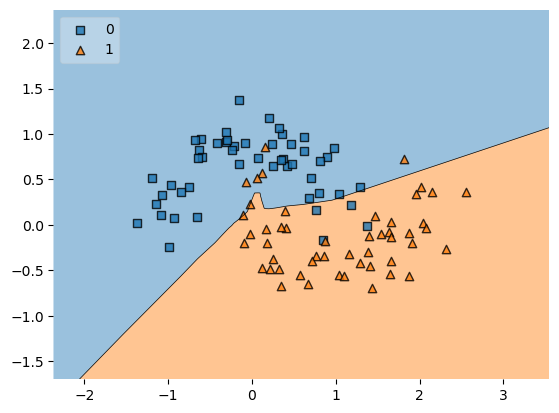

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)